## Contents 
1. [<span style="color:black">Import packages</span>](#1) <a id="one"></a>  
2. [<span style="color:black">Read in data</span>](#2)  <a id="two"></a>  
3. [<span style="color:black">Prepare mni and tni values: Calculate summed frequency</span>](#3) <a id="three"></a>  
4. [<span style="color:black">Impact of site sample size</span>](#4) <a id="four"></a>   
5. [<span style="color:black">Impact of ceramic quantification method</span>](#5) <a id="five"></a>  
6. [<span style="color:black">Differences in import consumption between sites</span>](#6) <a id="six"></a>  
7. [<span style="color:black">Different origins of imports</span>](#7) <a id="seven"></a>  
8. [<span style="color:black">Diversity in ceramic categories</span>](#8) <a id="eight"></a>  
9. [<span style="color:black">Ceramic type diversity</span>](#9) <a id="nine"></a>  
10. [<span style="color:black">Refinement of site dating</span>](#10) <a id="ten"></a>  
11. [<span style="color:black">Iron Age traditions and Roman influence</span>](#11) <a id="eleven"></a>  
12. [<span style="color:black">Frequency of Hispanic terra sigillata individuals per site</span>](#12) <a id="twelve"></a> 
13. [<span style="color:black">Frequency per form: Roman inspired local forms per site</span>](#13) <a id="thirteen"></a> 
14. [<span style="color:black">Evolution of imported goods reception in the middle Minho basin</span>](#14) <a id="fourteen"></a> 

### [<span style="color:black">1. Import packages</span>](#one) <a id="1"></a> 

In [1]:
import sys

sys.path.append("../../src")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from calculation import sum_freq_per_year, year_freq_df, year_object_count_df
from plot import plot_graph

### [<span style="color:black">2. Read in data</span>](#two)  <a id="2"></a>

In [2]:
data = pd.read_excel("../data/ATLANTICA_thesis_v0.3.xlsx")

### [<span style="color:black">3. Prepare mni and tni values: Calculate summed frequency</span>](#three) <a id="3"></a>

In [3]:
methods = ["mni", "tni"]

form = data.groupby(["origin_h1", "origin_h2", "form", "start_date", "end_date", "site"])["tni", "mni"].apply(lambda x : x.sum())
form = form.reset_index()

form_h2 = data.groupby(["origin_h1", "origin_h2", "form", "form_h2", "start_date", "end_date", "site"])["tni", "mni"].apply(lambda x : x.sum())
form_h2 = form_h2.reset_index()

for method in methods:
    form = sum_freq_per_year(form,
                             sum_freq = method,
                             lower_date = "start_date",
                             upper_date = "end_date",
                             freq_per_year = f"sum_freq_per_year_{method}")

    form_h2 = sum_freq_per_year(form_h2,
                                sum_freq = method,
                                lower_date = "start_date",
                                upper_date = "end_date",
                                freq_per_year = f"sum_freq_per_year_{method}")

C:\Users\alba_\AppData\Local\Temp/ipykernel_9444/1977153611.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  form = data.groupby(["origin_h1", "origin_h2", "form", "start_date", "end_date", "site"])["tni", "mni"].apply(lambda x : x.sum())
C:\Users\alba_\AppData\Local\Temp/ipykernel_9444/1977153611.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  form_h2 = data.groupby(["origin_h1", "origin_h2", "form", "form_h2", "start_date", "end_date", "site"])["tni", "mni"].apply(lambda x : x.sum())


In [4]:
form.head()

,origin_h1,origin_h2,form,start_date,end_date,site,tni,mni,sum_freq_per_year_mni,sum_freq_per_year_tni
0,gaul,lagraufesenque,drag. 15/17,30.0,60.0,armea,3.0,2.0,0.066667,0.100000
1,gaul,lagraufesenque,drag. 15/17,30.0,60.0,castromao,1.0,1.0,0.033333,0.033333
2,gaul,lagraufesenque,drag. 18/31,30.0,60.0,armea,1.0,1.0,0.033333,0.033333
3,gaul,lagraufesenque,drag. 27,40.0,80.0,armea,7.0,6.0,0.150000,0.175000
4,gaul,lagraufesenque,drag. 27,40.0,80.0,castromao,1.0,1.0,0.025000,0.025000


In [5]:
form_h2.head()

,origin_h1,origin_h2,form,form_h2,start_date,end_date,site,tni,mni,sum_freq_per_year_mni,sum_freq_per_year_tni
0,gaul,lagraufesenque,drag. 15/17,plato,30.0,60.0,armea,3.0,2.0,0.066667,0.100000
1,gaul,lagraufesenque,drag. 15/17,plato,30.0,60.0,castromao,1.0,1.0,0.033333,0.033333
2,gaul,lagraufesenque,drag. 18/31,plato,30.0,60.0,armea,1.0,1.0,0.033333,0.033333
3,gaul,lagraufesenque,drag. 27,copa,40.0,80.0,armea,7.0,6.0,0.150000,0.175000
4,gaul,lagraufesenque,drag. 27,copa,40.0,80.0,castromao,1.0,1.0,0.025000,0.025000


### [<span style="color:black">4. Impact of site sample size</span>](#four) <a id="4"></a>  

C:\Users\alba_\AppData\Local\Temp/ipykernel_9444/4080603404.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
C:\Users\alba_\AppData\Local\Temp/ipykernel_9444/4080603404.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


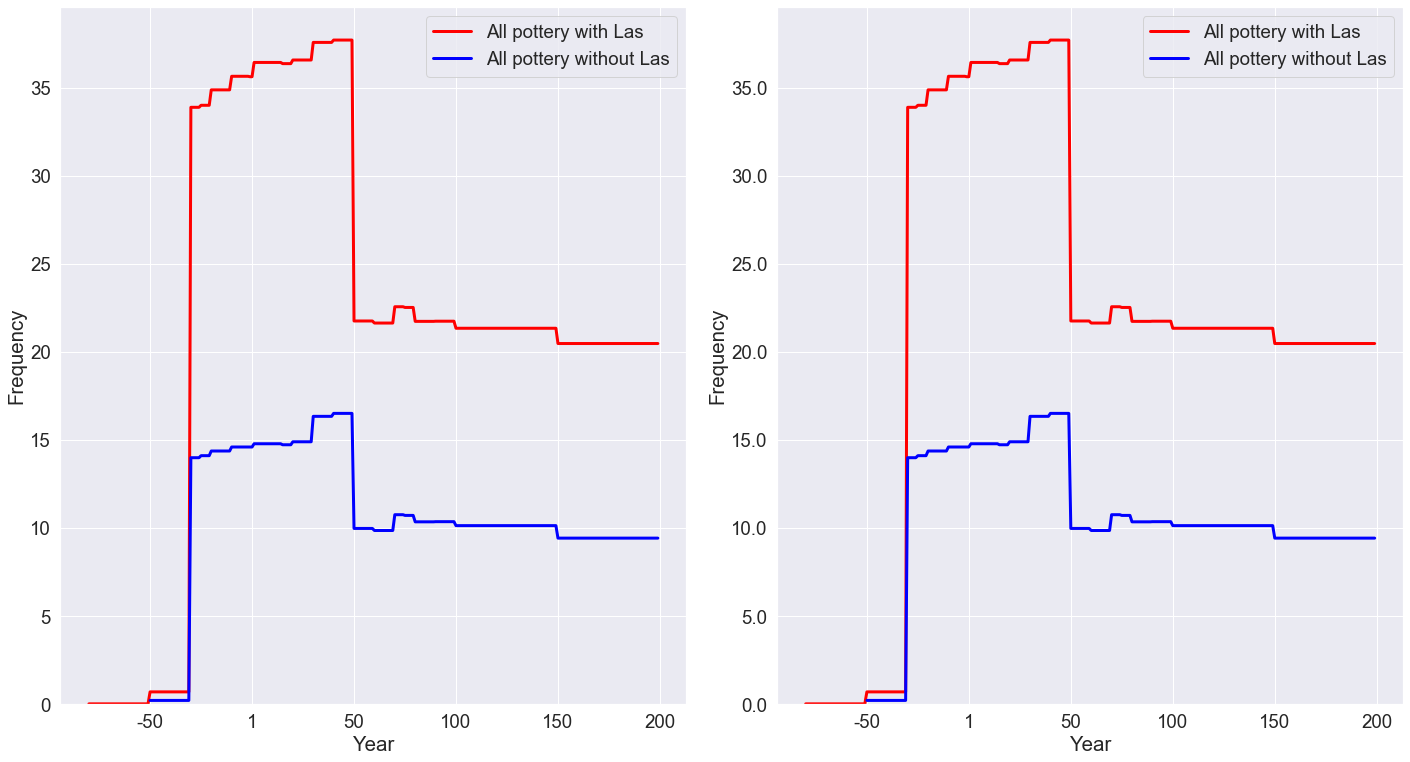

In [6]:
conditions = {"All pottery with Las": form[(form["site"] == "san cibran de las") | (form['site'] == "castromao") | (form["site"] == "armea") | (form["site"] == "laias")],
              "All pottery without Las": form[(form["site"] != "san cibran de las")],
              "Imports with Las": form[(form["origin_h1"] == "iberianpeninsula") & (form["origin_h2"] != "local") | (form["origin_h1"] == "gaul") | (form["origin_h1"] == "italy")],
              "Imports without Las": form[(form["origin_h1"] == "iberianpeninsula") & (form["origin_h2"] != "local") | (form["origin_h1"] == "gaul") | (form["origin_h1"] == "italy") & (form["site"] != "san cibran de las")]}
freq_sample_size = {}

for key, value in conditions.items():
    freq = year_freq_df(value,
                        lower_date = "start_date",
                        upper_date = "end_date",
                        sum_freq = "sum_freq_per_year_mni")
    freq_sample_size[key] = freq

sns.set(font_scale=1.7)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 11))

for ax in axs.ravel():
    plot_graph(dicts_of_df = freq_sample_size,
               palette=["red", "blue"],  
               linestyle = "solid",
               ax = ax)
    ax.set_ylim(0, None)
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Year")
    ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

axs[0].yaxis.set_major_formatter(FormatStrFormatter("%.0f"))  
axs[1].yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
 
plt.tight_layout()
plt.savefig("Figs/Fig3.png")
   

### [<span style="color:black">5. Impact of ceramic quantification method</span>](#five) <a id="5"></a>

C:\Users\alba_\AppData\Local\Temp/ipykernel_9444/4194393352.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
C:\Users\alba_\AppData\Local\Temp/ipykernel_9444/4194393352.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


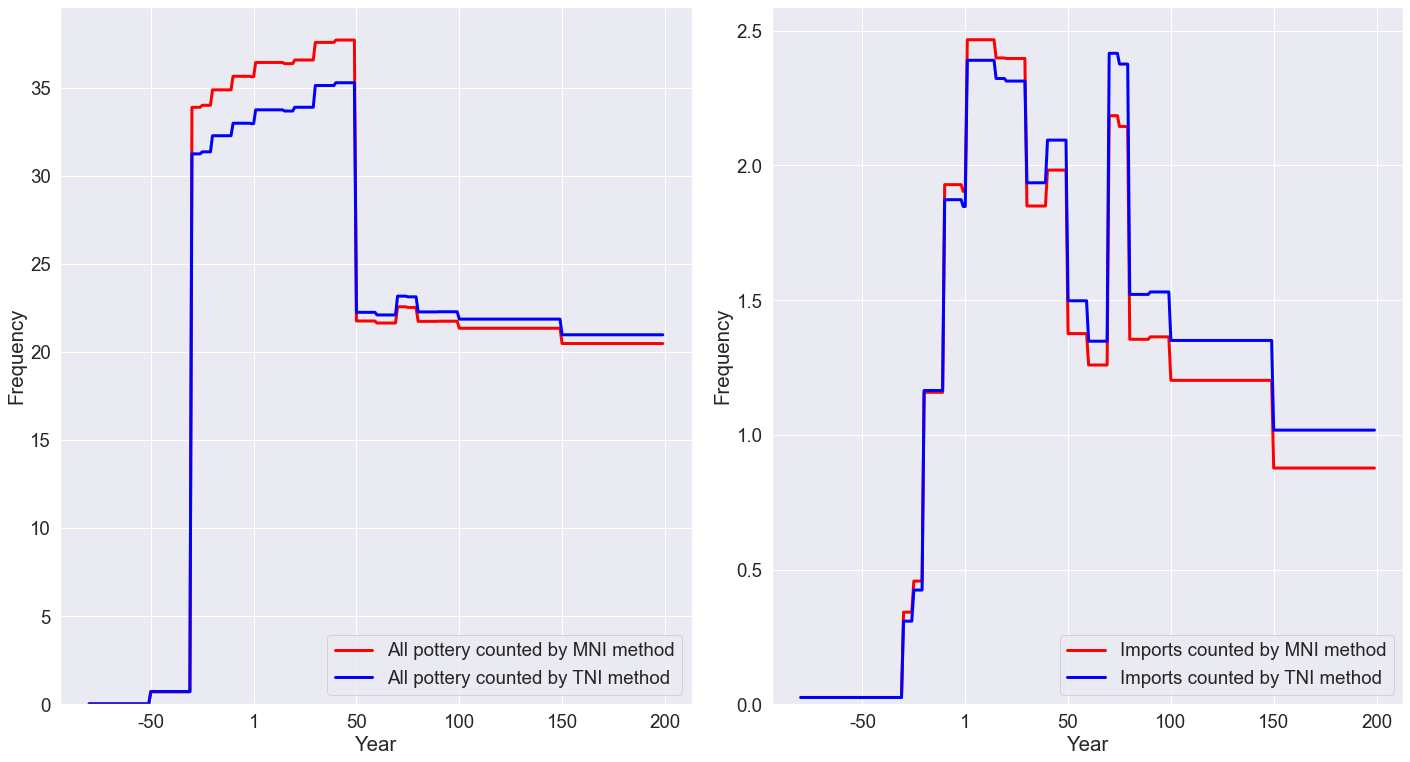

In [7]:
freq_pott = {}
freq_imp = {}
list_of_dfs = []

for method in methods:
    freq_all_pottery= year_freq_df(form[(form["site"] == "san cibran de las") | (form["site"] == "castromao") | (form["site"] == "armea") | (form["site"] == "laias")],
                                   lower_date = "start_date",
                                   upper_date = "end_date",
                                   sum_freq = f"sum_freq_per_year_{method}")

    freq_imports = year_freq_df(form[(form["origin_h2"] != "local")],
                                lower_date = "start_date",
                                upper_date = "end_date",
                                sum_freq = f"sum_freq_per_year_{method}")

    label = method.upper()

    freq_pott[f"All pottery counted by {label} method"] = freq_all_pottery
    freq_imp[f"Imports counted by {label} method"] = freq_imports

list_of_dfs.append(freq_pott)
list_of_dfs.append(freq_imp)

sns.set(font_scale=1.7)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 11))

for ax, d in zip(axs.ravel(), list_of_dfs):
    plot_graph(dicts_of_df = d,
               palette=["red", "blue"],  
               linestyle = "solid",
               ax = ax)
    ax.set_ylim(0, None)

    ax.set_ylabel("Frequency")
    ax.set_xlabel("Year")
    ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

axs[0].yaxis.set_major_formatter(FormatStrFormatter("%.0f"))  
axs[1].yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
    
plt.tight_layout()
plt.savefig("Figs/Fig4.png")


### [<span style="color:black">6. Differences in import consumption between sites</span>](#six) <a id="6"></a>

C:\Users\alba_\AppData\Local\Temp/ipykernel_9444/1793867881.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


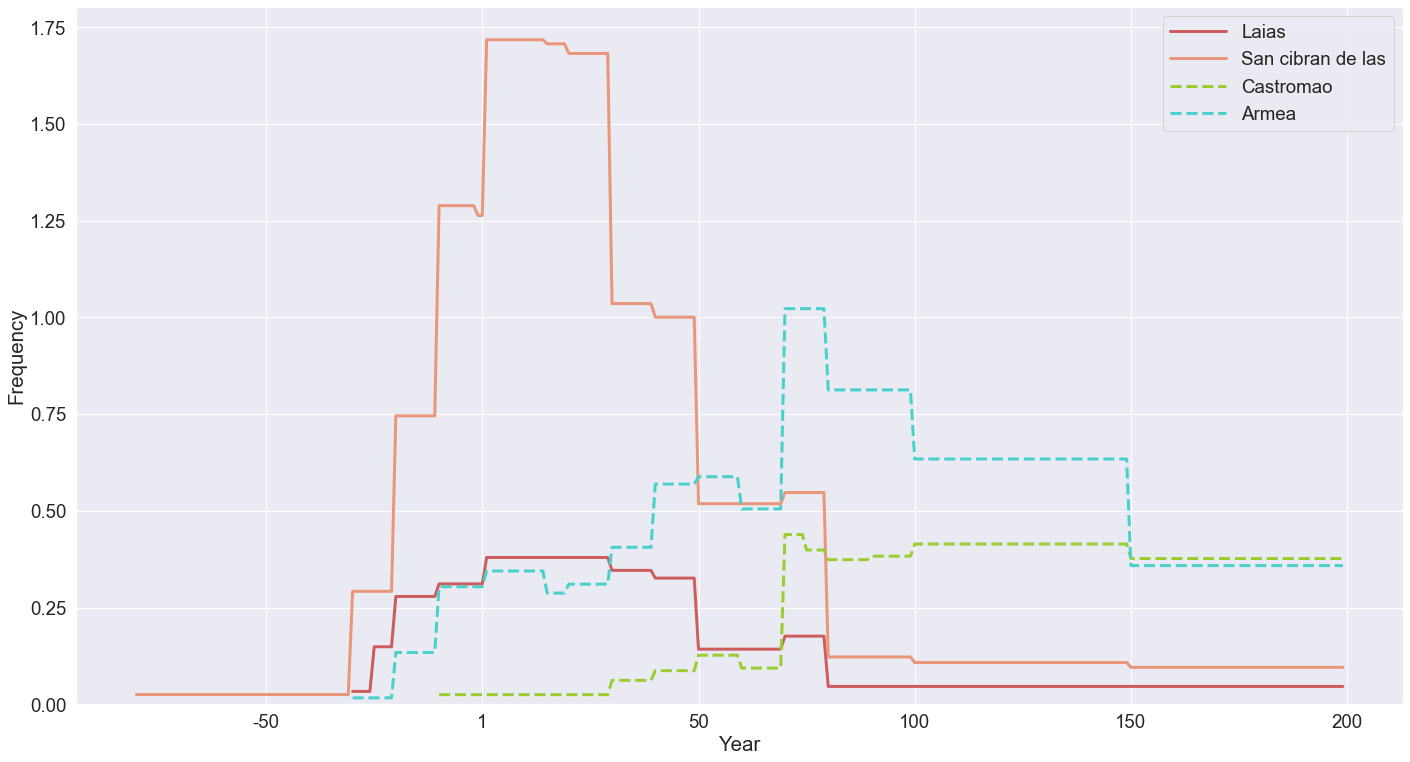

In [8]:
sites = ["laias", "san cibran de las", "castromao", "armea"]
freq_imp_cons = {}

for site in sites:
    freq = year_freq_df(form[(form["origin_h2"] != "local") & (form["site"] == site)],
                        lower_date = "start_date",  
                        upper_date = "end_date",
                        sum_freq = "sum_freq_per_year_mni")

    label = site.capitalize()
    freq_imp_cons[label] = freq

sns.set(font_scale=1.7)
fig, ax = plt.subplots(figsize=(20, 11))

plot_graph(dicts_of_df = freq_imp_cons,
           palette=["indianred", "darksalmon", "yellowgreen", "mediumturquoise"],  
           ax = ax)

ax.lines[0].set_linestyle("-") 
ax.lines[1].set_linestyle("-") 
ax.lines[2].set_linestyle("--") 
ax.lines[3].set_linestyle("--") 
ax.set_ylim(0, None)
ax.set_ylabel("Frequency")
ax.set_xlabel("Year")
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
plt.legend(handlelength=3)

plt.tight_layout()
plt.savefig("Figs/Fig5.png")

### [<span style="color:black">7. Different origins of imports</span>](#seven) <a id="7"></a>

C:\Users\alba_\AppData\Local\Temp/ipykernel_9444/2437895583.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


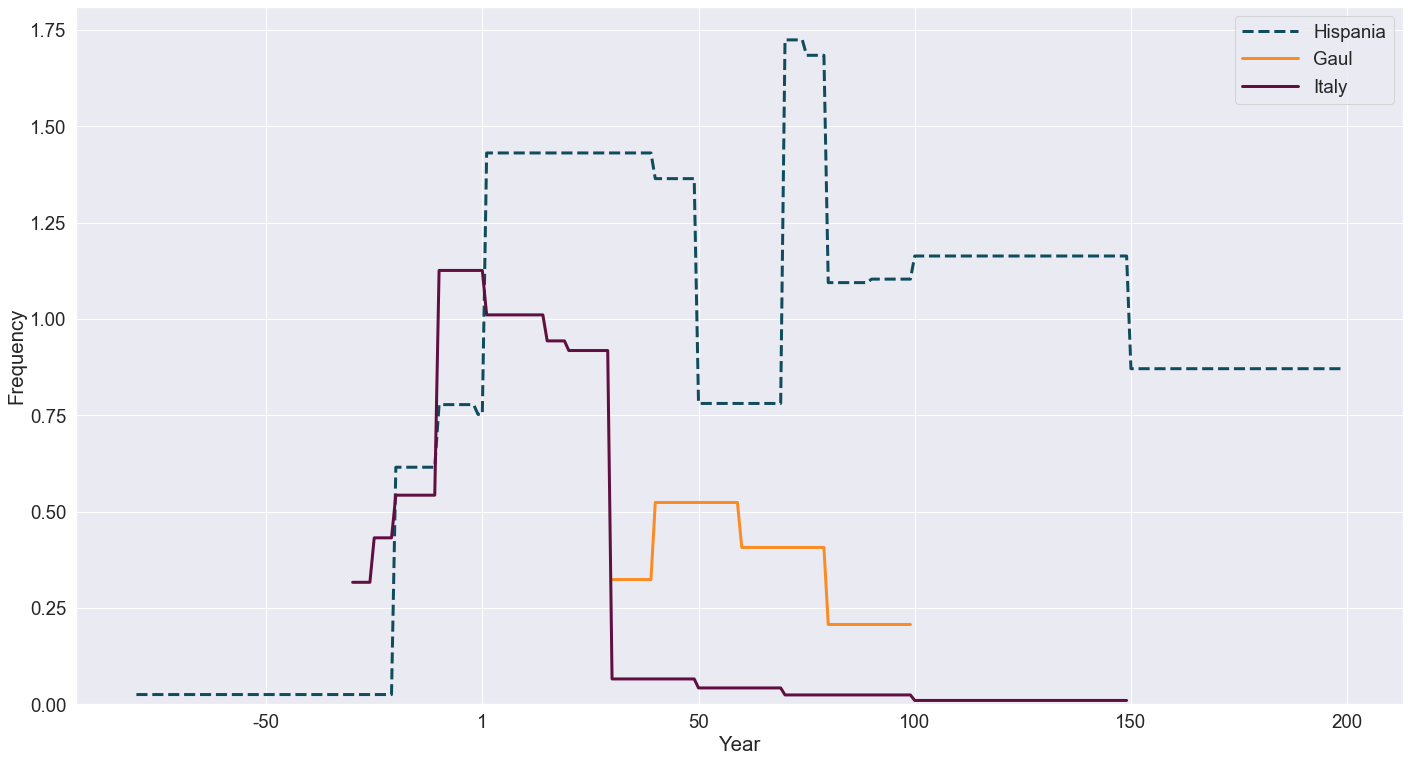

In [9]:
sites = ["iberianpeninsula", "gaul", "italy"]
freq_org_imp = {}

for site in sites:
    if site == "iberianpeninsula":
        df1 = form[(form["origin_h1"] == site) & (form["origin_h2"] != "local")]
        label = "Hispania"
    else:
        df1 = form[form["origin_h1"] == site]
        label = site.capitalize()
        
    freq = year_freq_df(df1,
                        lower_date = "start_date",  
                        upper_date = "end_date",
                        sum_freq = "sum_freq_per_year_mni")  
    freq_org_imp[label] = freq  

sns.set(font_scale=1.7)
fig, ax = plt.subplots(figsize=(20, 11))

plot_graph(dicts_of_df = freq_org_imp,
           palette=["#0F4C5C", "#FB8B24", "#5f0f40"],  
           ax = ax)

ax.lines[0].set_linestyle("--") 
ax.lines[1].set_linestyle("-") 
ax.lines[2].set_linestyle("-") 
ax.set_ylim(0, None)
ax.set_ylabel("Frequency")
ax.set_xlabel("Year")
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
plt.legend(handlelength=3)

plt.tight_layout()
plt.savefig("Figs/Fig6.png") 

### [<span style="color:black">8. Diversity in ceramic categories</span>](#eight) <a id="8"></a>

In [10]:
classes = data.groupby(["form", "start_date", "end_date", "origin_h1", "origin_h2"])["class"].apply(lambda x: ",".join(x))
classes = classes.apply(lambda x: x.split(","))
classes = classes.reset_index()
classes = classes.rename(columns = {"class":"List_of_class"})
classes.head()

,form,start_date,end_date,origin_h1,origin_h2,List_of_class
0,anfora de fondo plano,20.0,150.0,iberianpeninsula,local,"[anfora, anfora , anfora, anfora, anfora, anfo..."
1,anfora de fondo plano,20.0,150.0,unknown,unknown,[anfora]
2,barrenho,-20.0,50.0,iberianpeninsula,local,"[ceramica comun, ceramica comun, ceramica comu..."
3,botella,30.0,200.0,iberianpeninsula,local,"[ceramica comun, ceramica comun]"
4,brac. 24/25,50.0,100.0,iberianpeninsula,bracaraaugusta,[vajilla fina]


C:\Users\alba_\AppData\Local\Temp/ipykernel_9444/4008509120.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


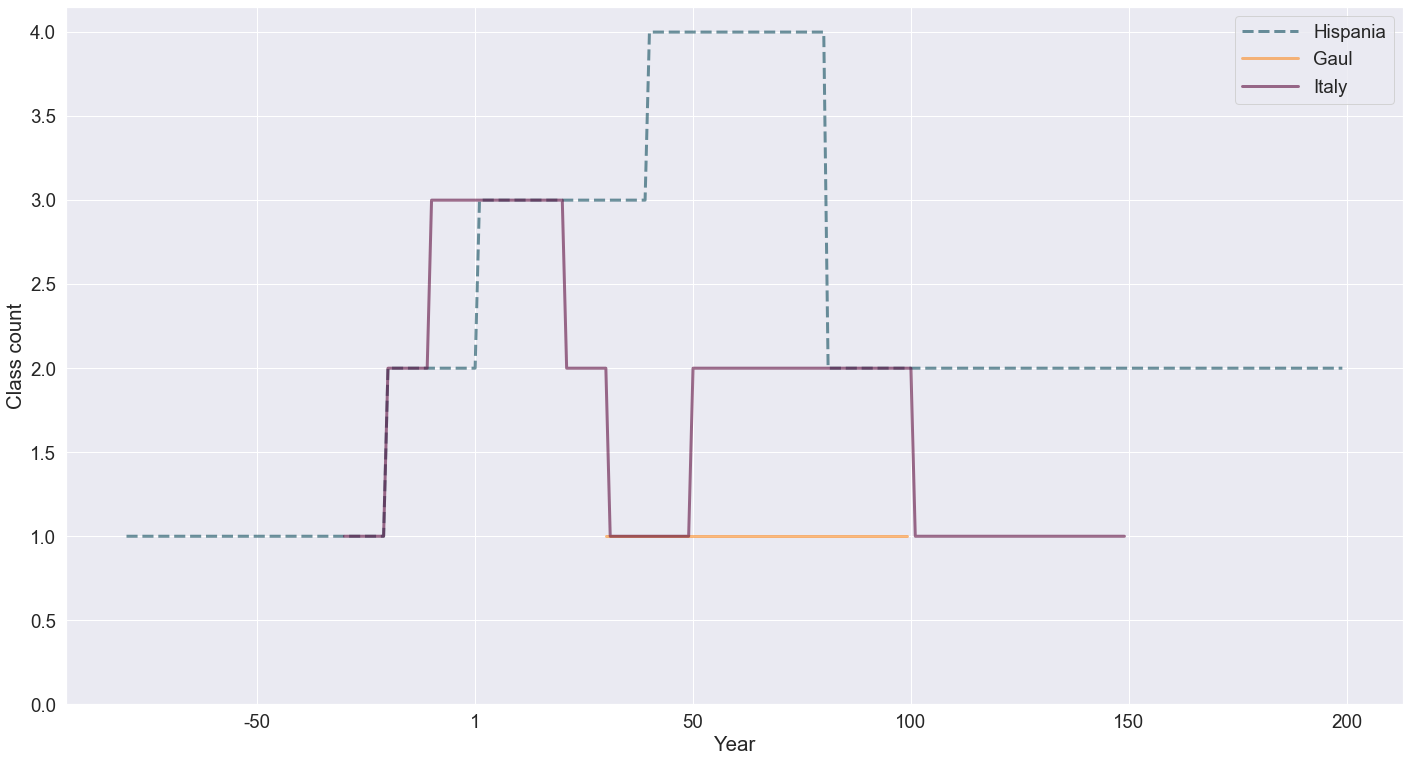

In [11]:
sites = ["iberianpeninsula", "gaul", "italy"]
freq_cer_cat = {}

for site in sites:
    if site == "iberianpeninsula":
        df1 = classes[(classes["origin_h1"] == site) & (classes["origin_h2"] != "local")]
        label = "Hispania"
    else:
        df1 = classes[classes["origin_h1"] == site]
        label = site.capitalize()

    freq = year_object_count_df(df1,
                                lower_date = "start_date",  
                                upper_date = "end_date",
                                object_list = "List_of_class")  
    freq_cer_cat[label] = freq  

sns.set(font_scale=1.7)
fig, ax = plt.subplots(figsize=(20, 11))

plot_graph(dicts_of_df = freq_cer_cat,
           palette=["#0F4C5C", "#FB8B24", "#5f0f40"],  
           ax = ax, 
           alpha = 0.6)

ax.lines[0].set_linestyle("--") 
ax.lines[1].set_linestyle("-") 
ax.lines[2].set_linestyle("-") 
ax.set_ylim(0, None)
ax.set_ylabel("Class count")
ax.set_xlabel("Year")
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
plt.legend(handlelength=3)

plt.tight_layout()
plt.savefig("Figs/Fig7.png") 

### [<span style="color:black">9. Ceramic type diversity</span>](#nine) <a id="9"></a>

In [12]:
form_types = data.groupby(["start_date", "end_date", "origin_h1", "origin_h2"])["form"].apply(lambda x: ",".join(x))
form_types= form_types.reset_index()
form_types = form_types.rename(columns = {"form":"List_of_formtypes"})
form_types.head()

,start_date,end_date,origin_h1,origin_h2,List_of_formtypes
0,-80.0,-1.0,iberianpeninsula,betica guadalquivir,ovoide 4?
1,-50.0,50.0,iberianpeninsula,local,"fuente,fuente,fuente,fuente,fuente,fuente,fuen..."
2,-30.0,30.0,iberianpeninsula,local,"quesera,quesera"
3,-30.0,30.0,italy,arezzo,consp. B.3.13.
4,-30.0,30.0,italy,etruria,"indeterminada,indeterminada,indeterminada"


C:\Users\alba_\AppData\Local\Temp/ipykernel_9444/2426746023.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


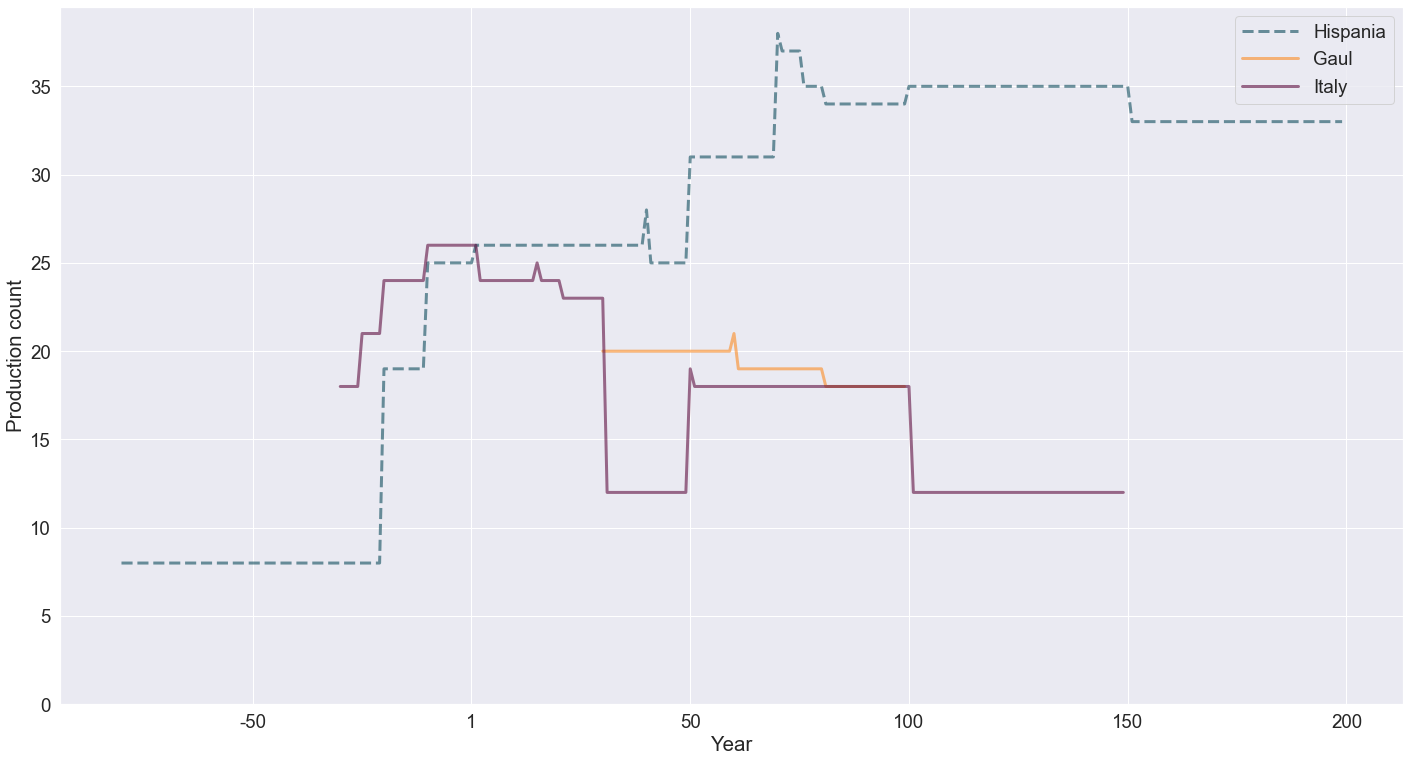

In [13]:
sites = ["iberianpeninsula", "gaul", "italy"]
production_count = {}

for site in sites:
    if site == "iberianpeninsula":
        df1 = form_types[(form_types["origin_h1"] == site) & (form_types["origin_h2"] != "local")]
        label = "Hispania"
    else:
        df1 = form_types[form_types["origin_h1"] == site]
        label = site.capitalize()

    freq = year_object_count_df(df1,
                              lower_date = "start_date",  
                                upper_date = "end_date",
                                object_list = "List_of_formtypes")  
    production_count[label] = freq   

sns.set(font_scale=1.7)
fig, ax = plt.subplots(figsize=(20, 11))

plot_graph(dicts_of_df = production_count,
           palette=["#0F4C5C", "#FB8B24", "#5f0f40"],  
           ax = ax, 
           alpha = 0.6)

ax.lines[0].set_linestyle("--") 
ax.lines[1].set_linestyle("-") 
ax.lines[2].set_linestyle("-") 
ax.set_ylim(0, None)
ax.set_ylabel("Production count")
ax.set_xlabel("Year")
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
plt.legend(handlelength=3)

plt.tight_layout()
plt.savefig("Figs/Fig8.png")

C:\Users\alba_\AppData\Local\Temp/ipykernel_9444/3921959603.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


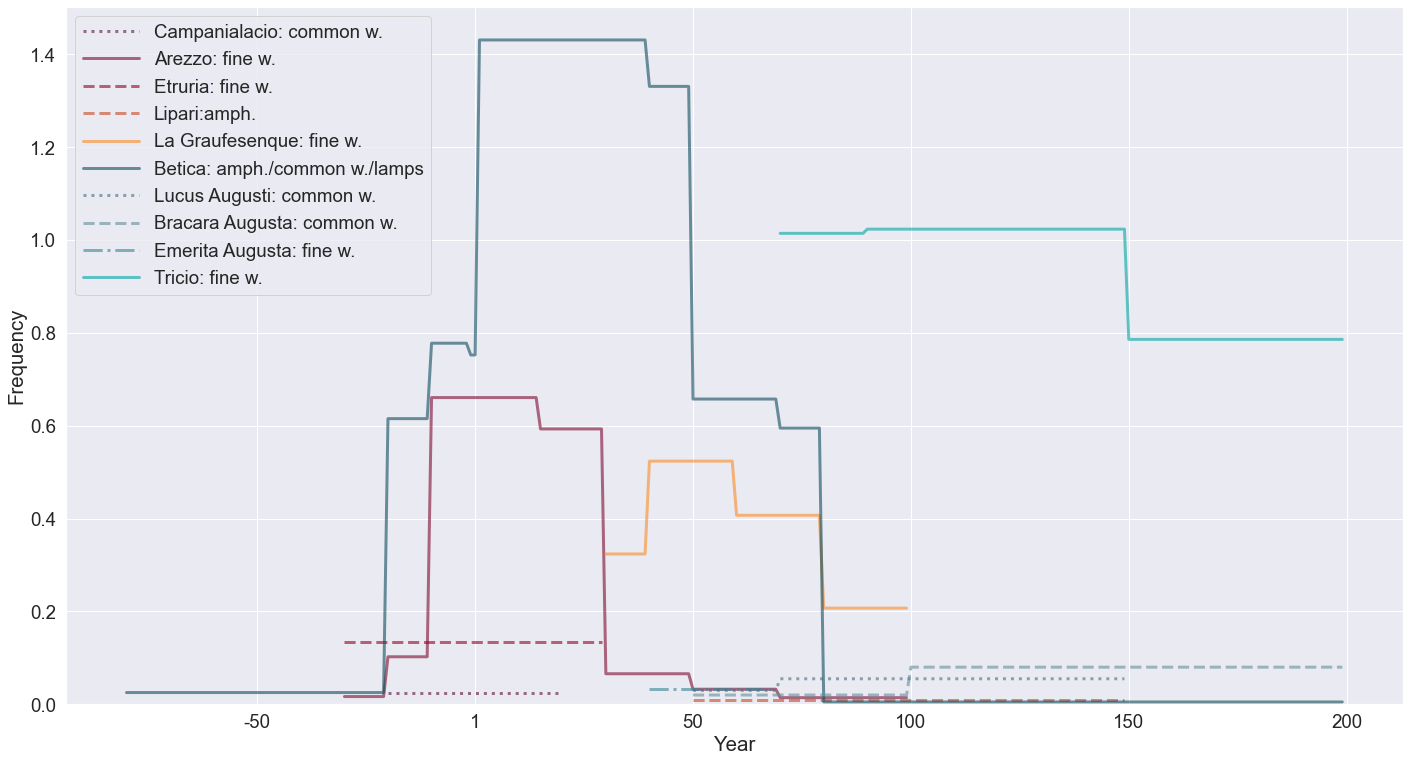

In [14]:
sites = ["campanialacio", "arezzo", "etruria",  "lipari", "lagraufesenque", "betica", "lucusaugusti", "bracaraaugusta", "emeritaaugusta", "tricio"]
freq_types = {}

for site in sites:
    if site == "betica":
        df1 = form[(form['origin_h2'] == site) | (form['origin_h2'] == 'betica guadalquivir') | (form['origin_h2'] == 'betica costera')]
    else:
        df1 = form[form["origin_h2"] == site]

    freq = year_freq_df(df1,
                        lower_date = "start_date",  
                        upper_date = "end_date",
                        sum_freq = "sum_freq_per_year_mni")  
    freq_types[site] = freq   

new_keys = ["Campanialacio: common w.", "Arezzo: fine w.", "Etruria: fine w.", "Lipari:amph.", "La Graufesenque: fine w.", "Betica: amph./common w./lamps", "Lucus Augusti: common w.", "Bracara Augusta: common w.", "Emerita Augusta: fine w.", "Tricio: fine w."]
freq_types = dict(zip(new_keys, list(freq_types.values())))

sns.set(font_scale=1.7)
fig, ax = plt.subplots(figsize=(20, 11))

plot_graph(dicts_of_df = freq_types,
           palette=["#5F0F40", "#7D092F", "#9A031E", "#CB4721", "#FB8B24", "#0F4C5C", "#3f707d", "#658d97", "#388697", "#00a6a6"],  
           ax = ax, 
           alpha = 0.6)

ax.lines[0].set_linestyle(":") 
ax.lines[1].set_linestyle("-") 
ax.lines[2].set_linestyle("--")
ax.lines[3].set_linestyle("--") 
ax.lines[4].set_linestyle("-")
ax.lines[5].set_linestyle("-") 
ax.lines[6].set_linestyle(":") 
ax.lines[7].set_linestyle("--") 
ax.lines[8].set_linestyle("-.") 
ax.lines[9].set_linestyle("-") 
ax.set_ylim(0, None)
ax.set_ylabel("Frequency")
ax.set_xlabel("Year")
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
plt.legend(handlelength=3)

plt.tight_layout()
plt.savefig("Figs/Fig9.png")

### [<span style="color:black">10. Refinement of site dating</span>](#ten) <a id="10"></a>

C:\Users\alba_\AppData\Local\Temp/ipykernel_9444/128602793.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
C:\Users\alba_\AppData\Local\Temp/ipykernel_9444/128602793.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
C:\Users\alba_\AppData\Local\Temp/ipykernel_9444/128602793.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
C:\Users\alba_\AppData\Local\Temp/ipykernel_9444/128602793.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


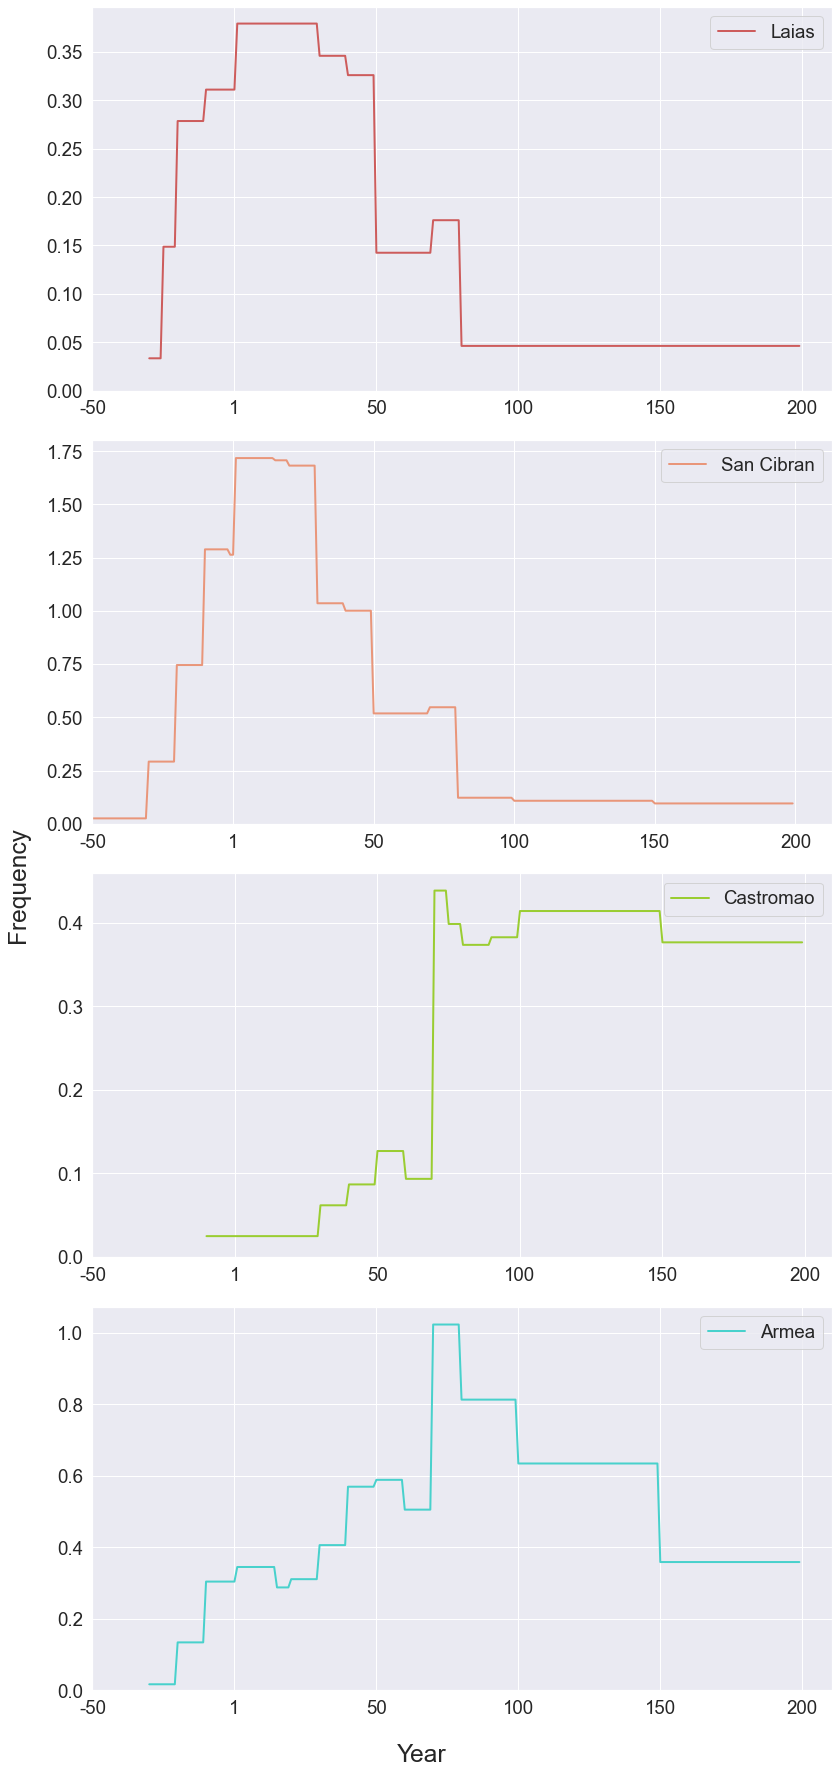

In [15]:
sites = ["laias", "san cibran de las", "castromao", "armea"]
list_of_dfs = []

for site in sites:
    freq_site_dating = {}
    freq = year_freq_df(form[(form['origin_h2'] != 'local') & (form['site'] == site)],
                        lower_date = 'start_date',
                        upper_date = 'end_date',
                        sum_freq = 'sum_freq_per_year_mni')     

    if site == "san cibran de las":
        label = "San Cibran"
    else:   
        label = site.capitalize()

    freq_site_dating[label] = freq
    list_of_dfs.append(freq_site_dating)

sns.set(font_scale=1.7)
fig, axs= plt.subplots(nrows=4, ncols=1, figsize=(12, 25))
colours = ["indianred", "darksalmon", "yellowgreen", "mediumturquoise"]

for ax, d, colour in zip(axs.ravel(), list_of_dfs, colours):
    plot_graph(dicts_of_df = d,
               palette=[colour],
               ax = ax,
               linewidth = 2)
    ax.set_ylim(0, None)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_xlim(-50, None)
    ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

fig.supylabel("Frequency")
fig.supxlabel("Year")
plt.tight_layout()
plt.savefig("Figs/Fig10.png")

### [<span style="color:black">11. Iron Age traditions and Roman influence</span>](#eleven) <a id="11"></a>

In [16]:
dataset = data[data['form'] != 'indeterminada'] 
df1 = dataset.groupby(['site', 'start_date', 'end_date', 'origin_h1', 'origin_h2'])['form'].apply(lambda x: ','.join(x))
df1 = df1.apply(lambda x: x.split(','))
df1 = df1.reset_index()
df1 = df1.rename(columns = {'form':'List_of_formtypes'})
df1.head()

,site,start_date,end_date,origin_h1,origin_h2,List_of_formtypes
0,armea,-50.0,50.0,iberianpeninsula,local,[fuente]
1,armea,-30.0,30.0,italy,arezzo,[consp. B.3.13.]
2,armea,-30.0,50.0,iberianpeninsula,local,"[tinaja, tinaja, vaso cilindrico, tinaja, tina..."
3,armea,-30.0,200.0,iberianpeninsula,local,"[olla, tapadera, olla, tapadera, olla, olla, t..."
4,armea,-20.0,15.0,italy,arezzo,"[consp. 22.1.3., consp. B.1.5.]"


C:\Users\alba_\AppData\Local\Temp/ipykernel_9444/167971708.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


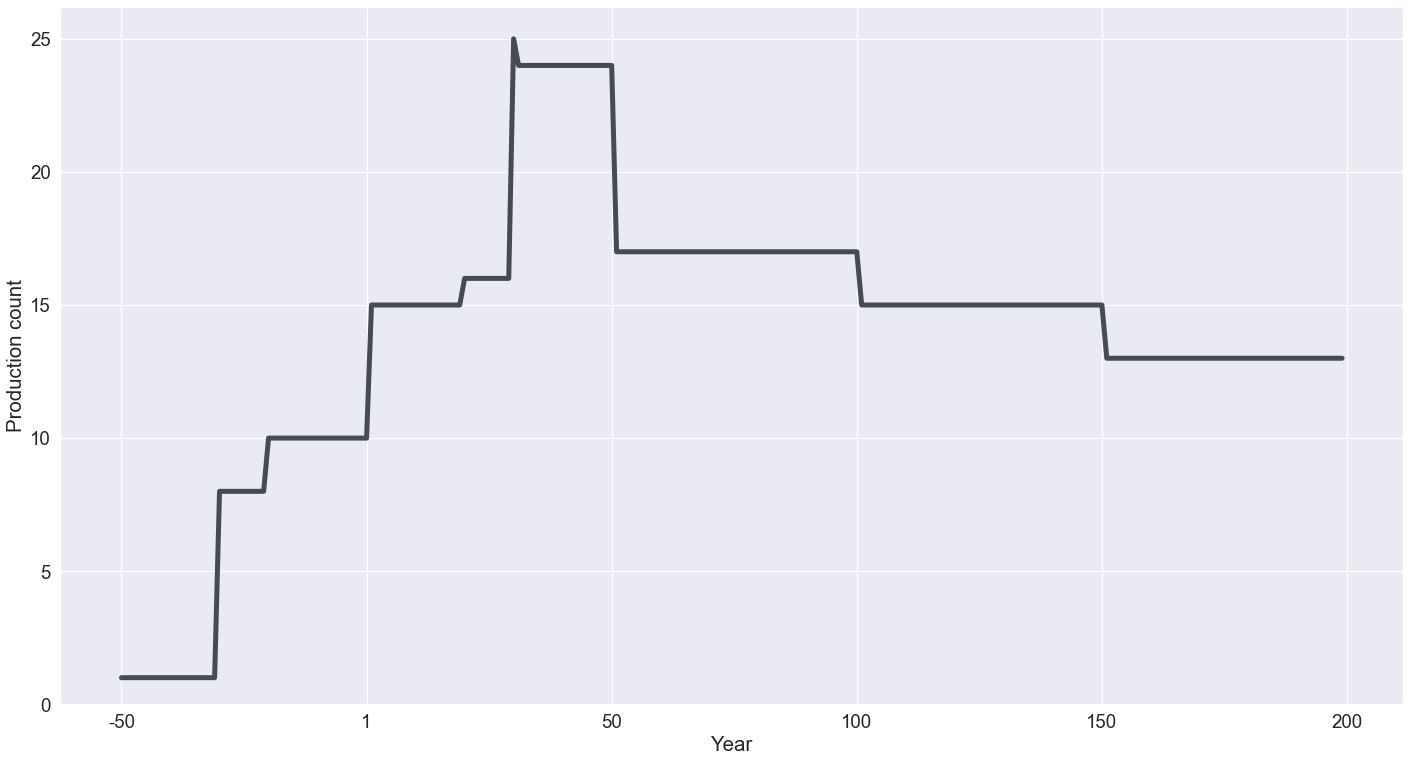

In [17]:
prod_count = year_object_count_df(df1[(df1['origin_h2'] == 'local')],
                                  lower_date = 'start_date',  
                                  upper_date = 'end_date',
                                  object_list = 'List_of_formtypes') 
count_dic = {'Local Productions': prod_count}

sns.set(font_scale=1.7)
fig, ax = plt.subplots(figsize=(20, 11))

plot_graph(dicts_of_df = count_dic,
           palette=['#343a40'], 
           linewidth= 5,
           ax = ax, 
           alpha = 0.9)
                    
ax.lines[0].set_linestyle("-") 
ax.set_ylim(0, None)
ax.set_ylabel("Production count")
ax.set_xlabel("Year")
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
ax.get_legend().remove() 

plt.tight_layout()
plt.savefig("Figs/Fig11.png")

C:\Users\alba_\AppData\Local\Temp/ipykernel_9444/1026714941.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


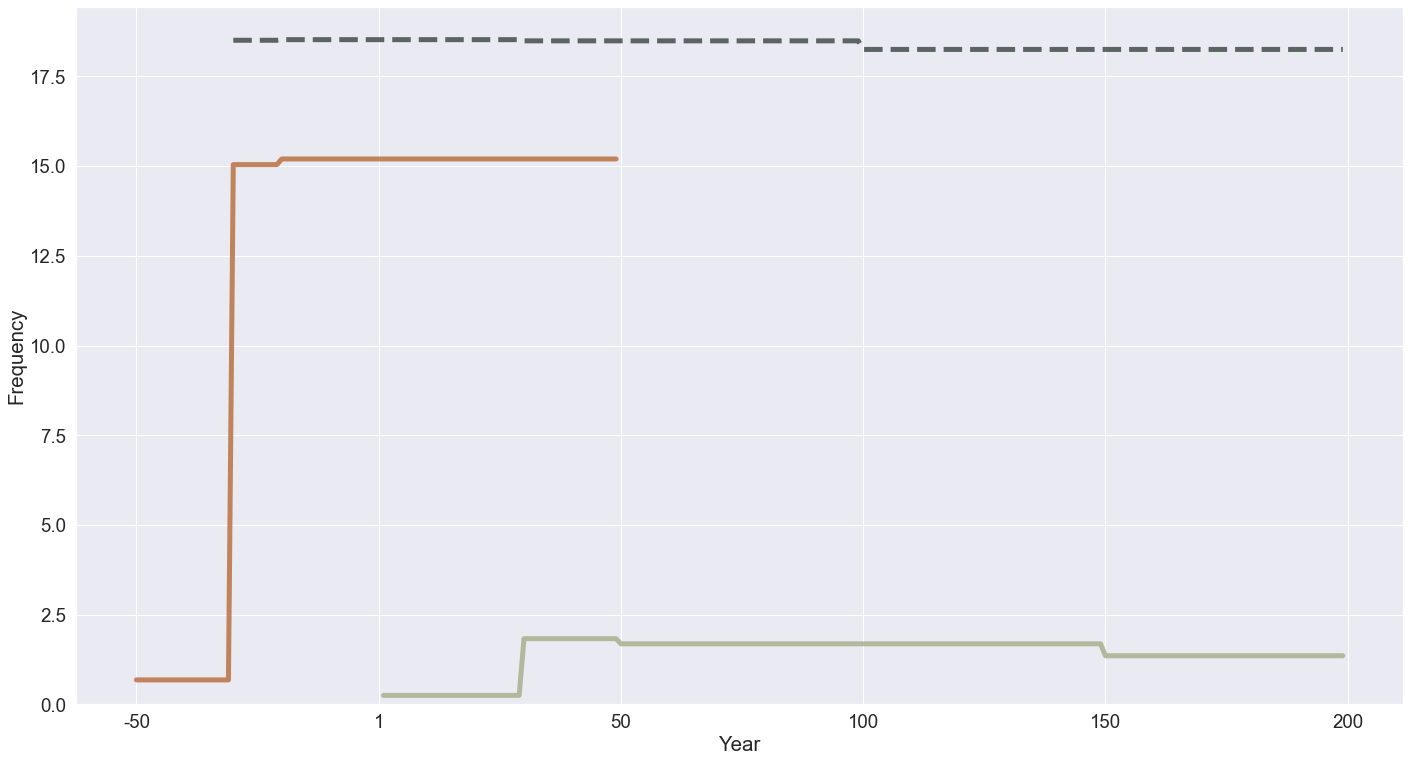

In [18]:
sites = ["iron age", "roman inspired", "both"]
freq_tradition = {}

for site in sites:
    freq = year_freq_df(form_h2[form_h2['form_h2'] == site],     
                        lower_date = 'start_date',
                        upper_date = 'end_date',
                        sum_freq = 'sum_freq_per_year_mni')   
    freq_tradition[site] = freq

sns.set(font_scale=1.7)
fig, ax = plt.subplots(figsize=(20, 11))

plot_graph(dicts_of_df = freq_tradition,
           palette=["#B76935", "#a4ac86", "#38413F"],  
           ax = ax, 
           linewidth= 5,
           alpha = 0.8)

ax.lines[0].set_linestyle("-") 
ax.lines[1].set_linestyle("-") 
ax.lines[2].set_linestyle("--")
ax.set_ylim(0, None)
ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
ax.get_legend().remove()
plt.tight_layout()
plt.savefig("Figs/Fig12.png")

### [<span style="color:black">12. Frequency of Hispanic terra sigillata individuals per site</span>](#twelve) <a id="12"></a>

In [19]:
dataset = data[data['form'] != 'indeterminada'] 
df1 = dataset.groupby(['site', 'start_date', 'end_date', 'origin_h1', 'origin_h2'])['form'].apply(lambda x: ','.join(x))
df1 = df1.apply(lambda x: x.split(','))
df1 = df1.reset_index()
df1 = df1.rename(columns = {'form':'List_of_formtypes'})
df1.head()

,site,start_date,end_date,origin_h1,origin_h2,List_of_formtypes
0,armea,-50.0,50.0,iberianpeninsula,local,[fuente]
1,armea,-30.0,30.0,italy,arezzo,[consp. B.3.13.]
2,armea,-30.0,50.0,iberianpeninsula,local,"[tinaja, tinaja, vaso cilindrico, tinaja, tina..."
3,armea,-30.0,200.0,iberianpeninsula,local,"[olla, tapadera, olla, tapadera, olla, olla, t..."
4,armea,-20.0,15.0,italy,arezzo,"[consp. 22.1.3., consp. B.1.5.]"


C:\Users\alba_\AppData\Local\Temp/ipykernel_9444/1750872675.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


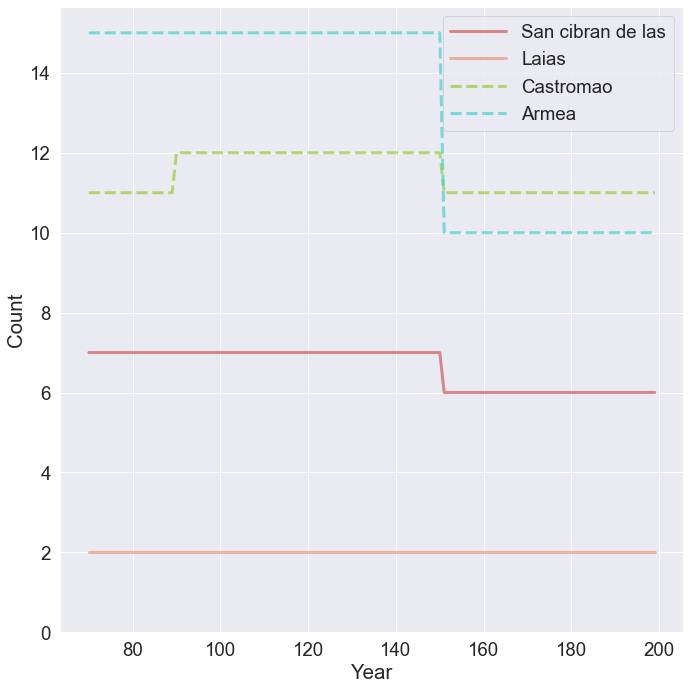

In [23]:
sites = ["san cibran de las", "laias", "castromao",  "armea"]
count_hispanic = {}

for site in sites:
    count_value = year_object_count_df(df1[(df1['origin_h2'] == 'tricio') & (df1['site'] == site)],
                                       lower_date = 'start_date',  
                                       upper_date = 'end_date',
                                       object_list = 'List_of_formtypes') 
    label = site.capitalize()
    count_hispanic[label] = count_value

sns.set(font_scale=1.7)
fig, ax = plt.subplots(figsize=(10, 10))

plot_graph(dicts_of_df = count_hispanic,
           palette=["indianred", "darksalmon", "yellowgreen", "mediumturquoise"],  
           ax = ax, 
           alpha = 0.7)

ax.lines[0].set_linestyle("-") 
ax.lines[1].set_linestyle("-") 
ax.lines[2].set_linestyle("--")
ax.lines[3].set_linestyle("--")
ax.set_ylim(0, None)
ax.set_ylabel("Count")
ax.set_xlabel("Year")

ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
plt.legend(handlelength=3)
plt.tight_layout()
plt.savefig("Figs/Fig13.png")

### [<span style="color:black">13. Frequency per form: Roman inspired local forms per site</span>](#thirteen) <a id="13"></a>

C:\Users\alba_\AppData\Local\Temp/ipykernel_9444/199377188.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


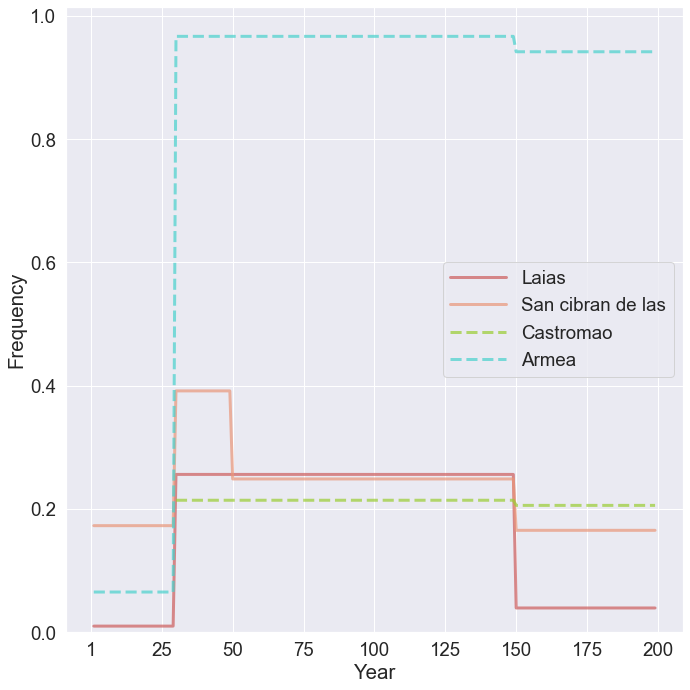

In [24]:
sites = ["laias", "san cibran de las", "castromao", "armea"]
freq_forms = {}

for site in sites:
    freq = year_freq_df(form_h2[(form_h2['form_h2'] == 'roman inspired') & (form_h2['origin_h2'] == 'local') & (form_h2['site'] == site)],
                        lower_date = 'start_date',
                        upper_date = 'end_date',
                        sum_freq = 'sum_freq_per_year_mni') 
    label= site.capitalize()
    freq_forms[label] = freq

sns.set(font_scale=1.7)
fig, ax = plt.subplots(figsize=(10, 10))

plot_graph(dicts_of_df = freq_forms,
           palette=["indianred", "darksalmon", "yellowgreen", "mediumturquoise"],  
           ax = ax, 
           alpha = 0.7)
           
ax.lines[0].set_linestyle("-") 
ax.lines[1].set_linestyle("-") 
ax.lines[2].set_linestyle("--")
ax.lines[3].set_linestyle("--")
ax.set_ylim(0, None)
ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
plt.legend(handlelength=3)
plt.tight_layout()
plt.savefig("Figs/Fig14.png")

### [<span style="color:black">14. Evolution of imported goods reception in the middle Minho basin</span>](#fourteen) <a id="14"></a>

C:\Users\alba_\AppData\Local\Temp/ipykernel_9444/1754679895.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


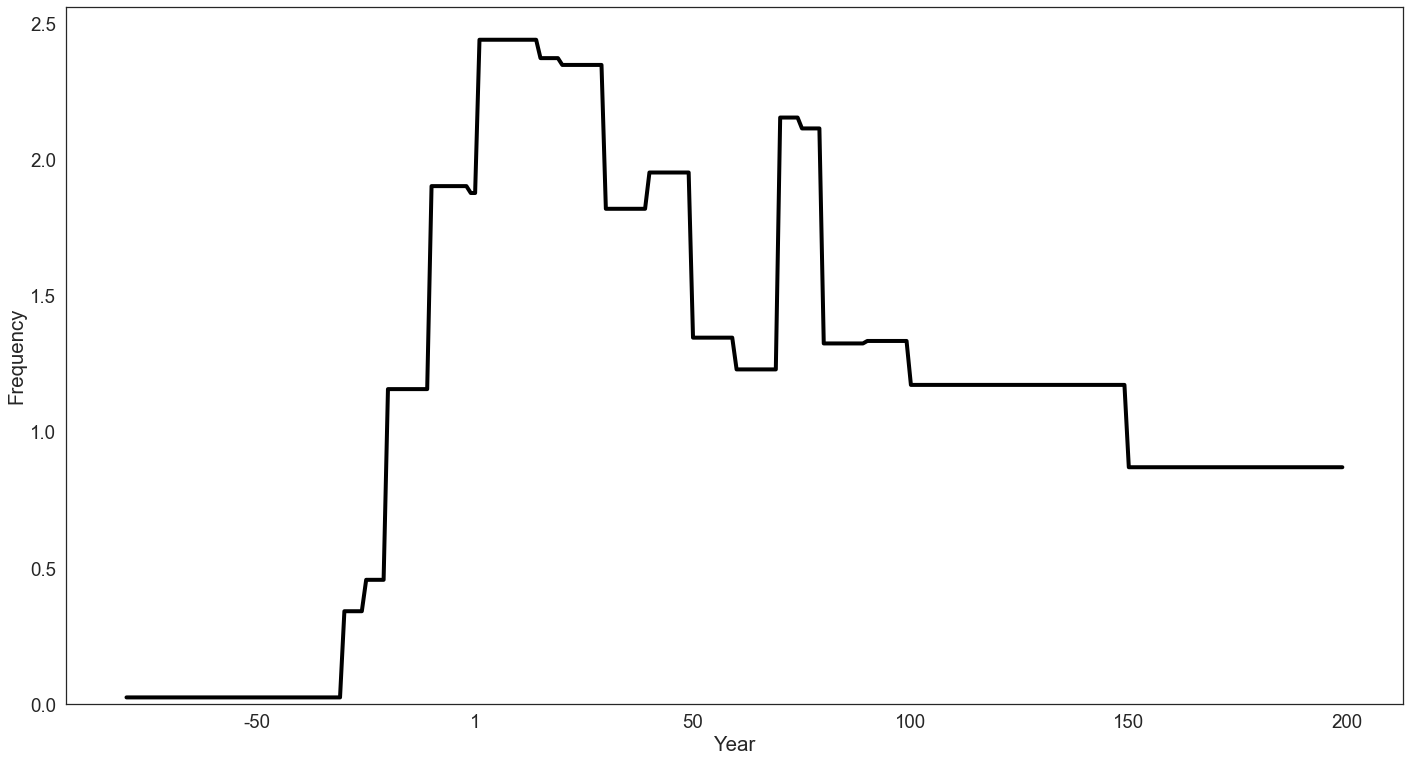

In [22]:
freq_import = year_freq_df(form[(form['origin_h1'] == 'iberianpeninsula') & (form['origin_h2'] != 'local') | (form['origin_h1'] == 'gaul') | (form['origin_h1'] == 'italy')],    
                           lower_date = 'start_date',  
                           upper_date = 'end_date',
                           sum_freq = 'sum_freq_per_year_mni')

freq_evol = {'Imported goods': freq_import}

sns.set(font_scale=1.7)
sns.set_style(style='white')  
fig, ax = plt.subplots(figsize=(20, 11))

plot_graph(dicts_of_df = freq_evol,
           palette=['black'],  
           linestyle = 'solid',
           linewidth = '4',
           ax = ax)
           
ax.set_ylim(0, None)
ax.set_facecolor("white") 
ax.set_ylabel("Frequency")
ax.set_xlabel("Year")
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
ax.get_legend().remove() 

plt.tight_layout()
plt.savefig("Figs/Fig15.png")
